# Convergence of multislice algorithm

... with respect to the slice thickness.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from ase.build import bulk
from ase import Atoms
import numpy as np
from ase.build import mx2
from ase.visualize import view
from ase.visualize.plot import plot_atoms

import abtem
import abtem.noise

In [2]:
atoms = mx2(size=(3,3,1))
atoms.set_cell([1,1,1.0])
atoms.center(vacuum=3)

<AxesSubplot:>

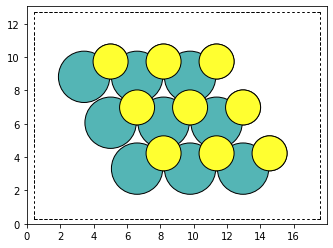

In [3]:
plot_atoms(atoms)

In [4]:
# Potential
sampling=0.1
cell_xy = np.asarray((atoms.cell[0,0], atoms.cell[1,1]))
pts = (cell_xy/sampling).astype(int)


In [5]:
def makewave(thickness):
    potential = abtem.Potential(atoms,
                          slice_thickness=thickness,
                          gpts=pts,
                          projection='finite',
                          parametrization='kirkland')
    # Plane Wave
    wave = abtem.PlaneWave(
        energy=50e3 # acceleration voltage in eV
    )
    # Multislice algorithm
    exit_wave = wave.multislice(potential,pbar=True)
    return exit_wave

In [6]:
def plotwave(exit_wave):
    wave = exit_wave.array[0]
    #rlim = abs(exit_wave.array.real - 1).max()
    #ilim = abs(exit_wave.array.imag).max()
    rlim, ilim = 0.3, 1.1
    print("Limits:", rlim, ilim)

    fig, ax = plt.subplots(1, 2, figsize=(10,5))
    ax[0].imshow(wave.real - 1, vmin=-rlim, vmax=rlim, cmap='seismic')
    ax[1].imshow(wave.imag, vmin=-rlim, vmax=rlim, cmap='seismic')
    return fig

Potential:   0%|          | 0/19 [00:00<?, ?it/s]

Multislice:   0%|          | 0/19 [00:00<?, ?it/s]

Limits: 0.3 1.1


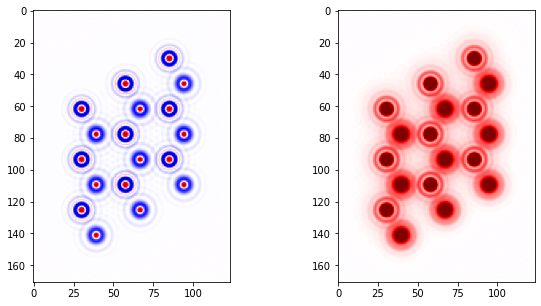

In [7]:
w = makewave(0.5)
fig = plotwave(w)


In [8]:
samplings = [2, 1, 0.5, 0.2, 0.1, 0.05, 0.02, 0.01]
waves = [makewave(s) for s in samplings]

Potential:   0%|          | 0/5 [00:00<?, ?it/s]

Multislice:   0%|          | 0/5 [00:00<?, ?it/s]

Potential:   0%|          | 0/10 [00:00<?, ?it/s]

Multislice:   0%|          | 0/10 [00:00<?, ?it/s]

Potential:   0%|          | 0/19 [00:00<?, ?it/s]

Multislice:   0%|          | 0/19 [00:00<?, ?it/s]

Potential:   0%|          | 0/46 [00:00<?, ?it/s]

Multislice:   0%|          | 0/46 [00:00<?, ?it/s]

Potential:   0%|          | 0/92 [00:00<?, ?it/s]

Multislice:   0%|          | 0/92 [00:00<?, ?it/s]

Potential:   0%|          | 0/184 [00:00<?, ?it/s]

Multislice:   0%|          | 0/184 [00:00<?, ?it/s]

Potential:   0%|          | 0/460 [00:00<?, ?it/s]

Multislice:   0%|          | 0/460 [00:00<?, ?it/s]

Potential:   0%|          | 0/919 [00:00<?, ?it/s]

Multislice:   0%|          | 0/919 [00:00<?, ?it/s]

Limits: 0.3 1.1
Limits: 0.3 1.1
Limits: 0.3 1.1
Limits: 0.3 1.1
Limits: 0.3 1.1
Limits: 0.3 1.1
Limits: 0.3 1.1
Limits: 0.3 1.1


[<Figure size 720x360 with 2 Axes>,
 <Figure size 720x360 with 2 Axes>,
 <Figure size 720x360 with 2 Axes>,
 <Figure size 720x360 with 2 Axes>,
 <Figure size 720x360 with 2 Axes>,
 <Figure size 720x360 with 2 Axes>,
 <Figure size 720x360 with 2 Axes>,
 <Figure size 720x360 with 2 Axes>]

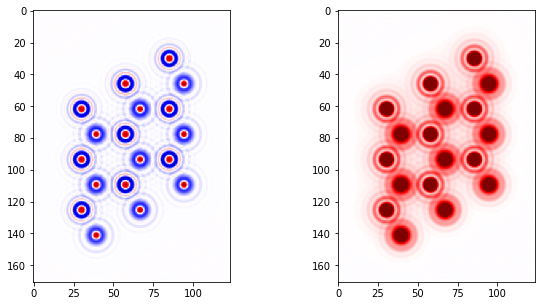

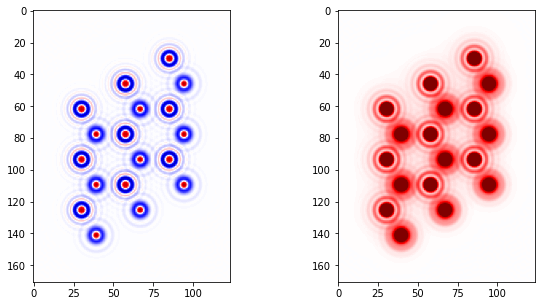

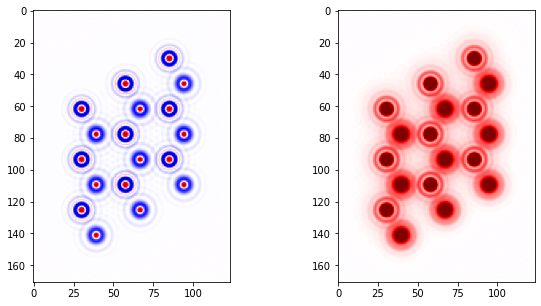

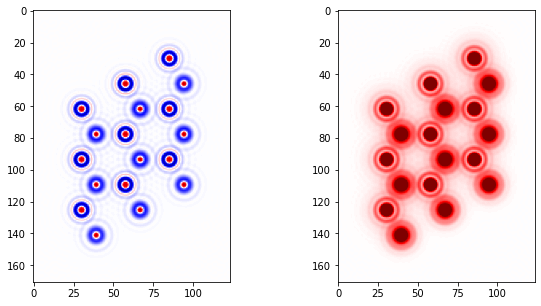

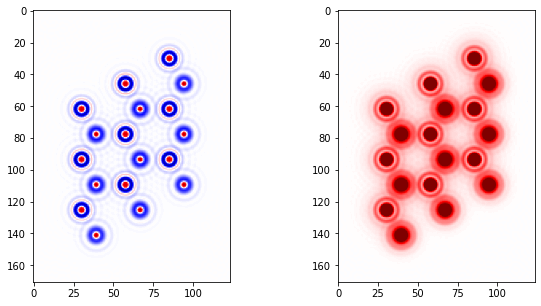

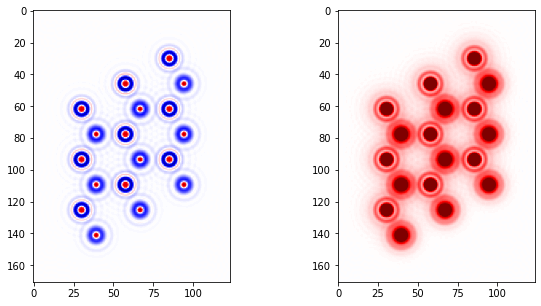

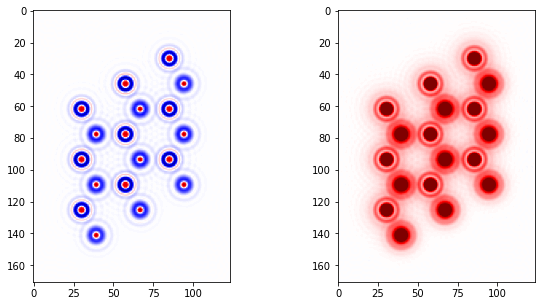

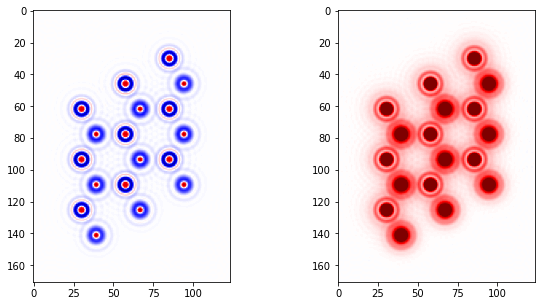

In [9]:
[plotwave(w) for w in waves]

In [10]:
def relative(e_wave, e_best):
    wave = e_wave.array[0]
    best = e_best.array[0]
    norm = np.abs(best - 1).sum()
    diff = np.abs(wave - best).sum()
    return diff/norm

In [11]:
b = waves[-1]
waveerrors = [relative(w, b)**2 for w in waves]
waveerrors

[0.037911961414265116,
 0.028251403042993894,
 0.004269730043135134,
 0.0008063171160138799,
 0.0003918025958554207,
 0.00013834170097076857,
 4.5924556337479695e-05,
 0.0]

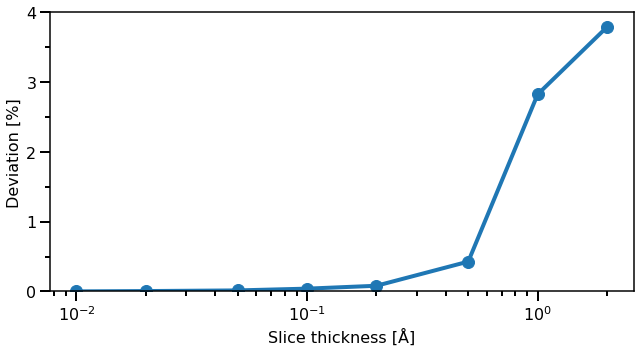

In [19]:
textsize = 16

y = np.array(waveerrors) * 100
fig, ax = plt.subplots(1,1,figsize=(9,5))
ax.plot(samplings, y, '-o',
       linewidth=4, markersize=12)
ax.set_xscale('log')
ax.set_ylim(0, 4)
#ax.set_xlim(min(samplings), 3)
ax.set_xlabel("Slice thickness [Å]", fontsize=textsize)
ax.set_ylabel("Deviation [%]", fontsize=textsize)
#ax.set_yticks(np.arange(min(y), max(y)+1, 1.0))
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1.0))
ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.5))

ax.tick_params(axis='both', which='major', 
               labelsize=textsize, length=10, width=2)
ax.tick_params(axis='both', which='minor', 
               length=5, width=2)
for x in ax.spines.values():
    x.set_linewidth(1.5)
plt.tight_layout()
plt.savefig('Multislice_convergence.png', dpi=300)

In [13]:
resample=.1 # Angstrom/pixel
dose=1e4 #electrons/Angstrom squared

MTF_param = {
    #'c0': 1.0,
    'c1': 0.05,
    'c2': 0.45,
    'c3': 2.5
}

CTF_param = {
    'focal_spread': 30,
    'defocus': 50,
    'Cs': 50e3,
}

def mtf_func(q, c1, c2, c3):
    """ 
    Simple MTF scaled so q=q/2qn where qn is the Nyqvist freq.
    
    This is equivalent to q*s where s is the sampling.
    """
    return (1 - c1) / ( 1 + (q / c2)**c3 ) + c1

def makeimage(wave):
    ctf = abtem.CTF(
        energy = wave.energy,
        **CTF_param
    )
    image_wave = wave.apply_ctf(ctf)
    measurement_raw = image_wave.intensity().squeeze() 
    #interpolate(resample)
    measurement_interp = measurement_raw.interpolate(resample)

    # Apply MTF
    img_array = measurement_interp.array
    measurement_MTF = measurement_interp.copy()
    # Get sampling from measurement
    s = []
    for calibration in measurement_MTF.calibrations:
        if calibration is not None:
            if calibration.units.lower() in ('angstrom', 'å'):
                s.append(calibration.sampling)
    print("Sampling:", s)
    kx = np.fft.fftfreq(img_array.shape[0], d=s[0])*s[0]
    ky = np.fft.fftfreq(img_array.shape[1], d=s[1])*s[1]
    Kx, Ky, = np.meshgrid(kx,ky, indexing='ij')
    K = np.sqrt(Kx**2 + Ky**2)
    print(kx.shape, ky.shape, K.shape, img_array.shape)
    new_img_array = np.fft.ifft2(np.fft.fft2(img_array) * mtf_func(K,**MTF_param))
    measurement_MTF.array[:] = new_img_array.real

    img = measurement_MTF.array
    return img


In [14]:
images = [makeimage(w) for w in waves]

Sampling: [0.10017543368869357, 0.10020893619906518]
(171,) (124,) (171, 124) (171, 124)
Sampling: [0.10017543368869357, 0.10020893619906518]
(171,) (124,) (171, 124) (171, 124)
Sampling: [0.10017543368869357, 0.10020893619906518]
(171,) (124,) (171, 124) (171, 124)
Sampling: [0.10017543368869357, 0.10020893619906518]
(171,) (124,) (171, 124) (171, 124)
Sampling: [0.10017543368869357, 0.10020893619906518]
(171,) (124,) (171, 124) (171, 124)
Sampling: [0.10017543368869357, 0.10020893619906518]
(171,) (124,) (171, 124) (171, 124)
Sampling: [0.10017543368869357, 0.10020893619906518]
(171,) (124,) (171, 124) (171, 124)
Sampling: [0.10017543368869357, 0.10020893619906518]
(171,) (124,) (171, 124) (171, 124)


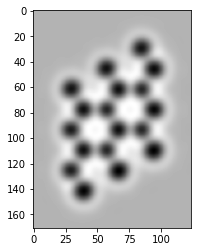

In [15]:
plt.imshow(images[0], cmap='gray')

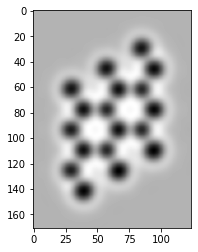

In [16]:
plt.imshow(images[-1], cmap='gray')

In [17]:
def imgrelative(img, best):
    norm = np.abs(best - best.mean()).sum()
    diff = np.abs(img - best).sum()
    return diff/norm

In [18]:

[imgrelative(im, images[-1]) for im in images]

[0.01996839,
 0.014643333,
 0.007571921,
 0.005038175,
 0.006284088,
 0.0058051986,
 0.0060331863,
 0.0]